# Details about Midterm Exam

## Date & Time: <font color=blue>Thursday, October 7</font>

Check your email for the time you are scheduled to take the midterm exam. Let me know if there are conflicts well in advance.

* **All exams will be proctored with Honorlock.**

## In-class review: <font color=orange>Monday, October 4</font>

Post questions in the [Midterm Exam Discussion Board](https://ufl.instructure.com/courses/435230/discussion_topics/3175588) until **Sunday, October 3 @ 3 PM**.
* These questions will be addressed in-class on Monday, October 4.

## Coverage

Lectures 1-17 (modules 1-4)


## Practice Midterm Exam

1. Available in the [Assignment-Solutions](https://github.com/Fundamentals-of-Machine-Learning-F21/Assignments-Solutions) repo.

2. Practice Canvas Quizzes created to practice Honorlock proctoring and overall exam setup: [Pratice Midterm Exam - Honolorck Proctoring](https://ufl.instructure.com/courses/435230/quizzes/1036559)

3. Solutions to the practice exam will be posted before the in-class midterm review.

4. One of the questions in the practice exam asks about K-Means clustering, but K-Means clustering will __not__ be covered in the Midterm exam.

## Allowed Material for the Midterm
* 1-page letter-sized of **formulas** (front and back, handwritten or typed)
* scientific calculator
* Writing and scratch paper to write your answers. I will give an estimate on how many pages to bring in the review lecture.
* Bring a second device (e.g., phone, tablet or other) with the [CamScanner](https://www.camscanner.com/user/download) or [Scannable](https://evernote.com/products/scannable) app installed. This device is only to be used at the end of the exam to take pictures of your handwritten solutions
* **<font color=blue>TOTAL TIME:</font>** 2 hours + 15 minutes
 
**<font color=red>Communications between students or anyone else during the exam is considered cheating. Turn off all Slack notifications and other communications channels!</font>**

Ten (10) minutes prior to the time you are scheduled to take the exam, you will be able to see the Canvas quiz with your midterm exam.

___

# Lecture 15 - Naive Bayes Classifier; Mixture Models

## Naive Bayes Classifier

Therefore, for a given test point $\mathbf{x}^*$, our decision rule is:

$$P(C_1|\mathbf{x}^*) \underset{C_2}{\overset{C_1}{\gtrless}} P(C_2|\mathbf{x}^*)$$

Using the Bayes' rule, we can further rewrite it as:
\begin{align*}
\frac{P(\mathbf{x}^*|C_1)P(C_1)}{P(\mathbf{x}^*)} &\underset{C_2}{\overset{C_1}{\gtrless}} \frac{P(\mathbf{x}^*|C_2)P(C_2)}{P(\mathbf{x}^*)}
\end{align*}

This defines the **Naive Bayes Classifier**.

## Training a Generative Classifier

So, **to train the classifier**, what we need to do is to determine the parametric form (and its parameters values) for $p(x|C_1)$, $p(x|C_2)$, $P(C_1)$ and $p(C_2)$.

* For example, we can assume that the data samples coming from either $C_1$ and $C_2$ are distributed according to Gaussian distributions. In this case, 

$$p(x|C_k) = \frac{1}{(2\pi)^{1/2} |\Sigma_k|^{1/2}}\exp\left\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu}_k)^T\Sigma_k^{-1}(\mathbf{x}-\mathbf{\mu}_k)\right\}, \forall k=\{1,2\}$$

For this case, this defines the **Gaussian Naive Bayes Classifier**.

Or, we can consider any other parametric distribution.

* What about the $P(C_1)$ and $P(C_2)$?

We can consider the relative frequency of each class, that is, $P(C_k) = \frac{N_k}{N}$, where $N_k$ is the number of points in class $C_k$ and $N$ is the total number of samples.

## MLE Parameter Estimation Steps

For simplification, let's consider the covariance matrix $\Sigma_k$ for $k=1,2$ to be **isotropic** matrices, that is, the covariance matrix is diagonal and the element along the diagonal is the same, or: $\Sigma_k = \sigma_k^2\mathbf{I}$.

* What are the parameters? The mean and covariance of the Gaussian distribution for both classes.

Given the assumption of the Gaussian form, how would you estimate the parameters for $p(x|C_1)$ and $p(x|C_2)$? We can use **maximum likelihood estimate** for the mean and covariance, because we are looking for the parameters of the distributions that *maximize* the data likelihood!

The MLE estimate for the mean of class $C_k$ is:

$$\mathbf{\mu}_{k,\text{MLE}} = \frac{1}{N_k}\sum_{n\in C_k} \mathbf{x}_n$$

where $N_k$ is the number of training data points that belong to class $C_k$.

Assuming the classes follow a (bivariate or 2-D) Gaussian distribution and, for simplicity, let's assume the covariance matrices are **isotropic**, that is, $\Sigma_k = \sigma^2_k \mathbf{I}$.

The MLE steps for parameter estimation are:

1. Write down the observed data likelihood, $\mathcal{L}^0$

\begin{align}
\mathcal{L}^0 &= P(x_1,x_2,\dots,x_N|C_k)\\
&= \prod_{n=1}^N P(x_n|C_k),\text{ data samples are i.i.d.} \\
&= \prod_{n=1}^N \frac{1}{(2\pi)^{1/2} |\Sigma|^{1/2}} \exp\left\{-\frac{1}{2}(x_n-\mu_k)^T\Sigma_k^{-1}(x_n-\mu_k)\right\}\\
&= \prod_{n=1}^N \frac{1}{(2\pi)^{1/2} |\sigma_k^2 \mathbf{I}|^{1/2}} \exp\left\{-\frac{1}{2\sigma_k^2}(x_n-\mu_k)^T\mathbf{I}(x_n-\mu_k)\right\}\\
&= \prod_{n=1}^N \frac{1}{(2\pi)^{1/2} (\sigma_k^2)^{1/2}} \exp\left\{-\frac{1}{2\sigma_k^2}(x_n-\mu_k)^T(x_n-\mu_k)\right\}
\end{align}

2. Take the log-likelihood, $\mathbf{L}$. This *trick* helps in taking derivatives.

\begin{align}
\mathcal{L} &= \ln\left(\mathcal{L}^0\right) \\
&= \sum_{n=1}^N -\frac{1}{2}\ln 2\pi - \frac{1}{2}\ln\sigma_k^2 - \frac{1}{2\sigma_k^2}(x_n-\mu_k)^T(x_n-\mu_k)
\end{align}

3. Take the derivative of the log-likelihood function with respect to the parameters of interest. For Gaussian distribution they are the mean and covariance.



\begin{align}
\frac{\partial \mathcal{L}}{\partial \mu_k} &= 0\\
\sum_{n\in C_k} \frac{1}{\sigma_k^2} (x_n - \mu_k) &= 0\\
\sum_{n\in C_k} (x_n - \mu_k) &= 0 \\
\sum_{n\in C_k} x_n - \sum_{n\in C_k} \mu_k &= 0 \\
\sum_{n\in C_k} x_n - N_k \mu_k &= 0 \\
\mu_k & = \frac{1}{N_k} \sum_{n\in C_k} x_n
\end{align}

This is the sample mean for each class. And,

\begin{align}
\frac{\partial \mathcal{L}}{\partial \sigma_k^2} &= 0\\
\sum_{n\in C_k} -\frac{1}{2\sigma_k^2} + \frac{2(x_n - \mu_k)^T(x_n - \mu_k)}{(2\sigma_k^2)^2} &=0 \\
\sum_{n\in C_k} -1 + \frac{(x_n - \mu_k)^T(x_n - \mu_k)}{\sigma_k^2} &=0 \\
\sum_{n\in C_k} \frac{(x_n - \mu_k)^T(x_n - \mu_k)}{\sigma_k^2} &=N_k \\
\sigma_k^2 &= \sum_{n\in C_k} \frac{(x_n - \mu_k)^T(x_n - \mu_k)}{N_k}
\end{align}

This is the sample variance for each class. Then we can create $\Sigma_k = \sigma_k^2 \mathbf{I}$, which is the (biased) sample covariance for each class.

In practice, if we want to estimate an entire covariance matrix, we would have to take the derivative of the log-likelihood function with respect to every entry in the covariance matrix.

We can determine the values for $p(C_1)$ and $p(C_2)$ from the number of data points in each class:

$$p(C_k) = \frac{N_k}{N}$$

where $N$ is the total number of data points.

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
def generateData(mean1, mean2, cov1, cov2, N1, N2):
    # We are generating data from two Gaussians to represent two classes
    # In practice, we would not do this - we would just have data from the problem we are trying to understand
    data_C1 = np.random.multivariate_normal(mean1, cov1, N1)
    data_C2 = np.random.multivariate_normal(mean2, cov2, N2)
    
    plt.scatter(data_C1[:,0], data_C1[:,1], c='r')
    plt.scatter(data_C2[:,0], data_C2[:,1])
    plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
    plt.axis([-4,4,-4,4])
    return data_C1, data_C2

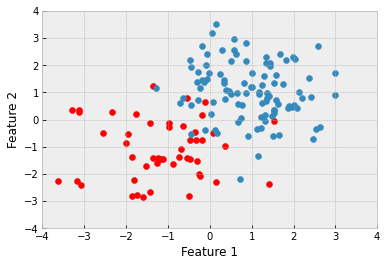

In [13]:
mean1 = [-1, -1]
mean2 = [1, 1]
cov1 = [[1,0],[0,1]]
cov2 = [[1,0],[0,1]]
N1 = 50
N2 = 100

data_C1, data_C2 = generateData(mean1, mean2, cov1, cov2, N1, N2)

In [14]:
data_C1.shape

(50, 2)

In [15]:
# Estimate the mean and covariance for each class from the training data

mu1 = np.mean(data_C1, axis=0)
print('Mean of Class 1: ', mu1)


cov1 = np.cov(data_C1.T) # because np.cov assumes data comes in as DxN
print('Covariance of Class 1: ',cov1)


mu2 = np.mean(data_C2, axis=0)
print('Mean of Class 2: ',mu2)


cov2 = np.cov(data_C2.T)
print('Covariance of Class 2: ',cov2)



# Estimate the prior for each class

pC1 = data_C1.shape[0]/(data_C1.shape[0]+data_C2.shape[0])
print('Probability of  Class 1: ',pC1)

pC2 = data_C2.shape[0]/(data_C1.shape[0]+data_C2.shape[0])
print('Probability of Class 2: ',pC2)

Mean of Class 1:  [-1.21519443 -1.10616409]
Covariance of Class 1:  [[1.44725922 0.06498299]
 [0.06498299 1.16522598]]
Mean of Class 2:  [0.95239041 1.03401998]
Covariance of Class 2:  [[ 0.83583401 -0.13410859]
 [-0.13410859  1.08745696]]
Probability of  Class 1:  0.3333333333333333
Probability of Class 2:  0.6666666666666666


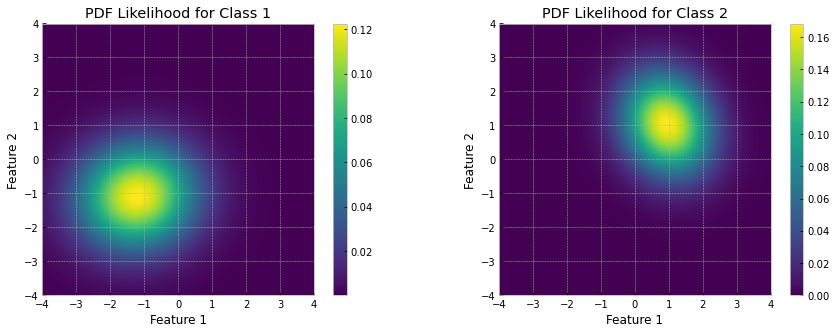

In [16]:
# Compute a grid of values for x and y 
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
xm, ym = np.meshgrid(x, y)
X = np.flip(np.dstack([xm,ym]),axis=0)

# Let's plot the probabaility density function (pdf) for each class
y1 = multivariate_normal.pdf(X, mean=mu1, cov=cov1) # P(x|C1)
y2 = multivariate_normal.pdf(X, mean=mu2, cov=cov2) # P(x|C2)


fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.imshow(y1, extent=[-4,4,-4,4])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 1')

fig.add_subplot(1,2,2)
plt.imshow(y2, extent=[-4,4,-4,4])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 2');

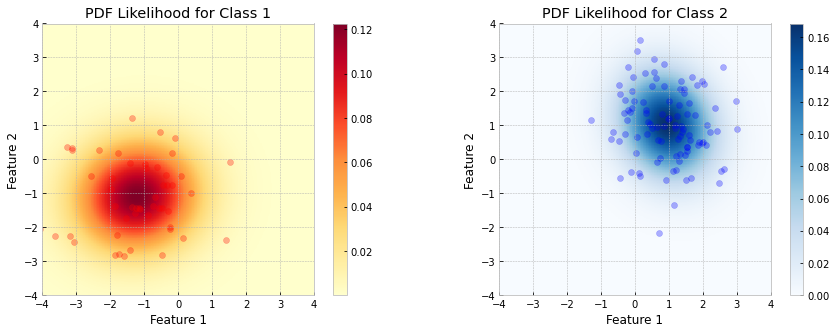

In [17]:
fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.scatter(data_C1[:,0], data_C1[:,1], c='r',alpha=0.3)
plt.imshow(y1, extent=[-4,4,-4,4],cmap='YlOrRd')
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 1')

fig.add_subplot(1,2,2)
plt.scatter(data_C2[:,0], data_C2[:,1], c='b',alpha=0.3)
plt.imshow(y2, extent=[-4,4,-4,4], cmap='Blues')
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 2');

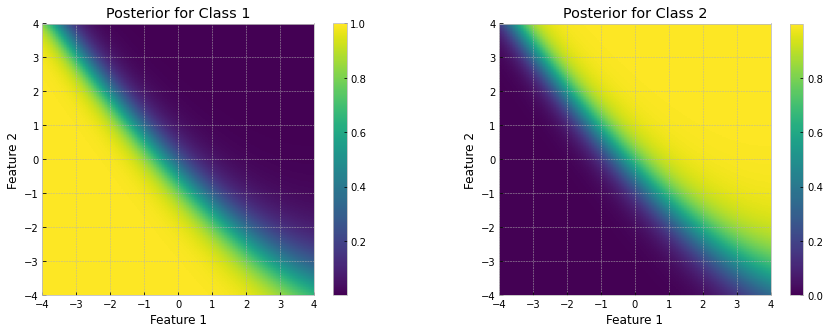

In [18]:
# Let's take a look at the posterior distributions: they represent our classification decision
pos1 = (y1*pC1)/(y1*pC1 + y2*pC2) # P(C1|x)
pos2 = (y2*pC2)/(y1*pC1 + y2*pC2) # P(C2|x)

fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.imshow(pos1, extent=[-4,4,-4,4])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('Posterior for Class 1')

fig.add_subplot(1,2,2)
plt.imshow(pos2, extent=[-4,4,-4,4])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('Posterior for Class 2');

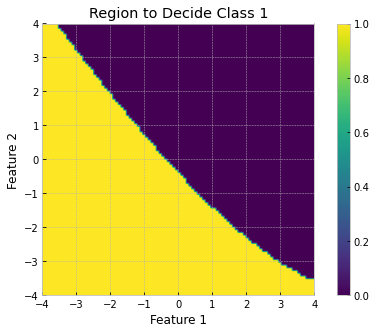

In [19]:
# Look at the decision boundary:
plt.figure(figsize=(8,5))
plt.imshow(pos1 > pos2, extent=[-4,4,-4,4])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('Region to Decide Class 1');

* Let's use this classifier to predict the class label for point $[1,1]$:

In [21]:
x = [1,1]

# Data Likelihoods
y1_newPoint = multivariate_normal.pdf(x, mean=mu1, cov=cov1) # p(x|C1)
y2_newPoint = multivariate_normal.pdf(x, mean=mu2, cov=cov2) # p(x|C2)

print('Data likelihoods:')
print('P(x|C1) = ', y1_newPoint)
print('P(x|C2) = ', y2_newPoint,'\n')

# Posterior Probabilities
y1_pos = y1_newPoint*pC1/(y1_newPoint*pC1 + y2_newPoint*pC2)
y2_pos = y2_newPoint*pC2/(y1_newPoint*pC1 + y2_newPoint*pC2)

print('Posterior probabilities:')
print('P(C1|x) = ', y1_pos)
print('P(C2|x) = ', y2_pos,'\n')

if y1_pos > y2_pos:
    print('x = ',x,' belongs to class 1')
else:
    print('x = ',x,' belongs to class 2')

Data likelihoods:
P(x|C1) =  0.003983945876533317
P(x|C2) =  0.16833065178108447 

Posterior probabilities:
P(C1|x) =  0.011695292633899514
P(C2|x) =  0.9883047073661004 

x =  [1, 1]  belongs to class 2


* What about $x=[2,4]$?

In [23]:
x = [2,4]

# Data Likelihoods
y1_newPoint = multivariate_normal.pdf(x, mean=mu1, cov=cov1) # p(x|C1)
y2_newPoint = multivariate_normal.pdf(x, mean=mu2, cov=cov2) # p(x|C2)

print('Data likelihoods:')
print('P(x|C1) = ', y1_newPoint)
print('P(x|C2) = ', y2_newPoint,'\n')

# Posterior Probabilities
y1_pos = y1_newPoint*pC1/(y1_newPoint*pC1 + y2_newPoint*pC2)
y2_pos = y2_newPoint*pC2/(y1_newPoint*pC1 + y2_newPoint*pC2)

print('Posterior probabilities:')
print('P(C1|x) = ', y1_pos)
print('P(C2|x) = ', y2_pos,'\n')

if y1_pos > y2_pos:
    print('x = ',x,' belongs to class 1')
else:
    print('x = ',x,' belongs to class 2')

Data likelihoods:
P(x|C1) =  8.676399018565161e-08
P(x|C2) =  0.000872588499860459 

Posterior probabilities:
P(C1|x) =  4.971396988221305e-05
P(C2|x) =  0.9999502860301178 

x =  [2, 4]  belongs to class 2


Let's expand the decision surface view:

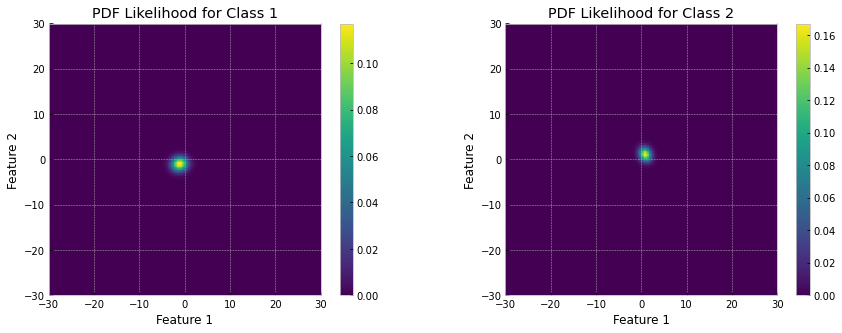

In [41]:
nd=30

# Compute a grid of values for x and y 
x = np.linspace(-nd, nd, 100)
y = np.linspace(-nd, nd, 100)
xm, ym = np.meshgrid(x, y)
X = np.flip(np.dstack([xm,ym]),axis=0)

# Let's plot the probabaility density function (pdf) for each class
y1 = multivariate_normal.pdf(X, mean=mu1, cov=cov1) # P(x|C1)
y2 = multivariate_normal.pdf(X, mean=mu2, cov=cov2) # P(x|C2)


fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.imshow(y1, extent=[-nd,nd,-nd,nd])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 1')

fig.add_subplot(1,2,2)
plt.imshow(y2, extent=[-nd,nd,-nd,nd])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 2');

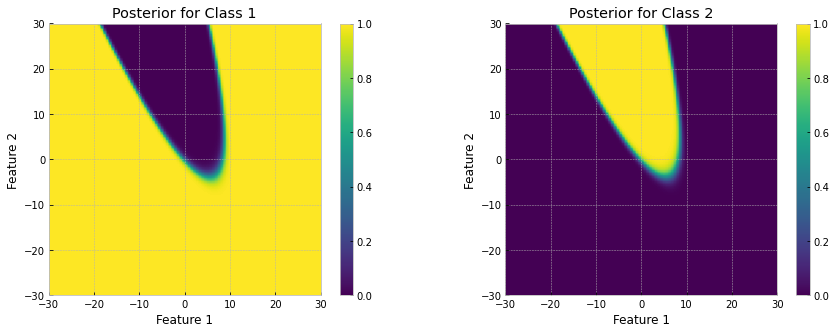

In [42]:
# Let's take a look at the posterior distributions: they represent our classification decision
pos1 = (y1*pC1)/(y1*pC1 + y2*pC2) # P(C1|x)
pos2 = (y2*pC2)/(y1*pC1 + y2*pC2) # P(C2|x)

fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.imshow(pos1, extent=[-nd,nd,-nd,nd])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('Posterior for Class 1')

fig.add_subplot(1,2,2)
plt.imshow(pos2, extent=[-nd,nd,-nd,nd])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('Posterior for Class 2');

* What about $x=[10,10]$?

In [43]:
x = [10,10]

# Data Likelihoods
y1_newPoint = multivariate_normal.pdf(x, mean=mu1, cov=cov1) # p(x|C1)
y2_newPoint = multivariate_normal.pdf(x, mean=mu2, cov=cov2) # p(x|C2)

print('Data likelihoods:')
print('P(x|C1) = ', y1_newPoint)
print('P(x|C2) = ', y2_newPoint,'\n')

# Posterior Probabilities
y1_pos = y1_newPoint*pC1/(y1_newPoint*pC1 + y2_newPoint*pC2)
y2_pos = y2_newPoint*pC2/(y1_newPoint*pC1 + y2_newPoint*pC2)

print('Posterior probabilities:')
print('P(C1|x) = ', y1_pos)
print('P(C2|x) = ', y2_pos,'\n')

if y1_pos > y2_pos:
    print('x = ',x,' belongs to class 1')
else:
    print('x = ',x,' belongs to class 2')

Data likelihoods:
P(x|C1) =  1.640177424643123e-41
P(x|C2) =  7.103322349039243e-45 

Posterior probabilities:
P(C1|x) =  0.9991345844764138
P(C2|x) =  0.0008654155235862463 

x =  [10, 10]  belongs to class 1


___

# Mixture Models

In this example, we look at a relatively simple model where we model each class with a single Gaussian probability density function (pdf).

* What if the data for a single class looked like the plot below?

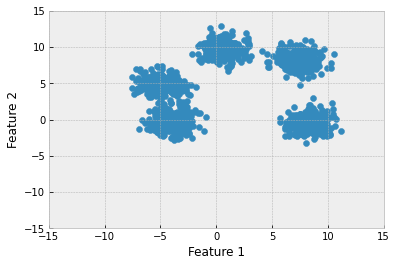

In [26]:
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples = 1500, centers = 5)

plt.scatter(data[:,0],data[:,1]); plt.axis([-15,15,-15,15])
plt.xlabel('Feature 1'); plt.ylabel('Feature 2');

If we assume a single Gaussian distribution, we would obtain a very poor estimate of the true underlying data likelihood:

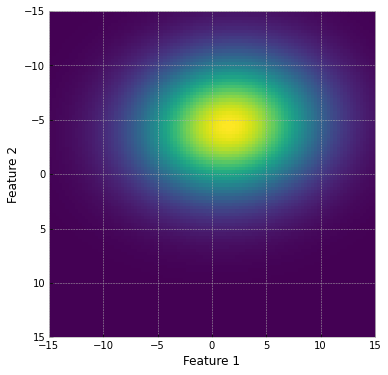

In [27]:
# Compute a grid of values for x and y 
x = np.linspace(-15, 15, 100)
y = np.linspace(-15,15, 100)
xm, ym = np.meshgrid(x, y)
X = np.flip(np.dstack([xm,ym]),axis=0)

y1 = multivariate_normal.pdf(X, mean=np.mean(data, axis=0), cov=np.cov(data.T))

plt.figure(figsize=(6,6))
plt.imshow(y1, extent=[-15,15,15,-15])
plt.xlabel('Feature 1'); plt.ylabel('Feature 2');

# Mixture Models

We can better represent this data with a **mixture model**:

$$p(x|\Theta) = \sum_{k=1}^K \pi_k P(x|\Theta_k)$$

where $\Theta = \{\Theta_k\}_{k=1}^K$ are set of parameters that define the distributional form in the probabilistic model $P(\bullet|\Theta_k)$ and 

\begin{align}
0 & \leq \pi_k \leq 1\\
& \sum_k \pi_k = 1
\end{align}

If the probabilistic model $P(\bullet|\Theta_k)$ is assumed to be a Gaussian distribution, then the above mixture model is a **Gaussian Mixture Model (GMM)**

$$P(x|\Theta) = \sum_{k=1}^K \pi_k \mathcal{N}(x|\mu_k, \Sigma_k)$$

where $\Theta_k=\{\mu_k, \Sigma_k, \pi_k\}, \forall k$ are the mean, covariance and weight of each Gaussian distribution, and, again, $0 \leq \pi_k \leq 1$ with $\sum_k \pi_k = 1$.